In [ ]:
print(X_train.shape)

(60000, 28, 28)


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist


In [ ]:
X_train[0].min(), X_train[0].max()


(0, 255)

In [ ]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

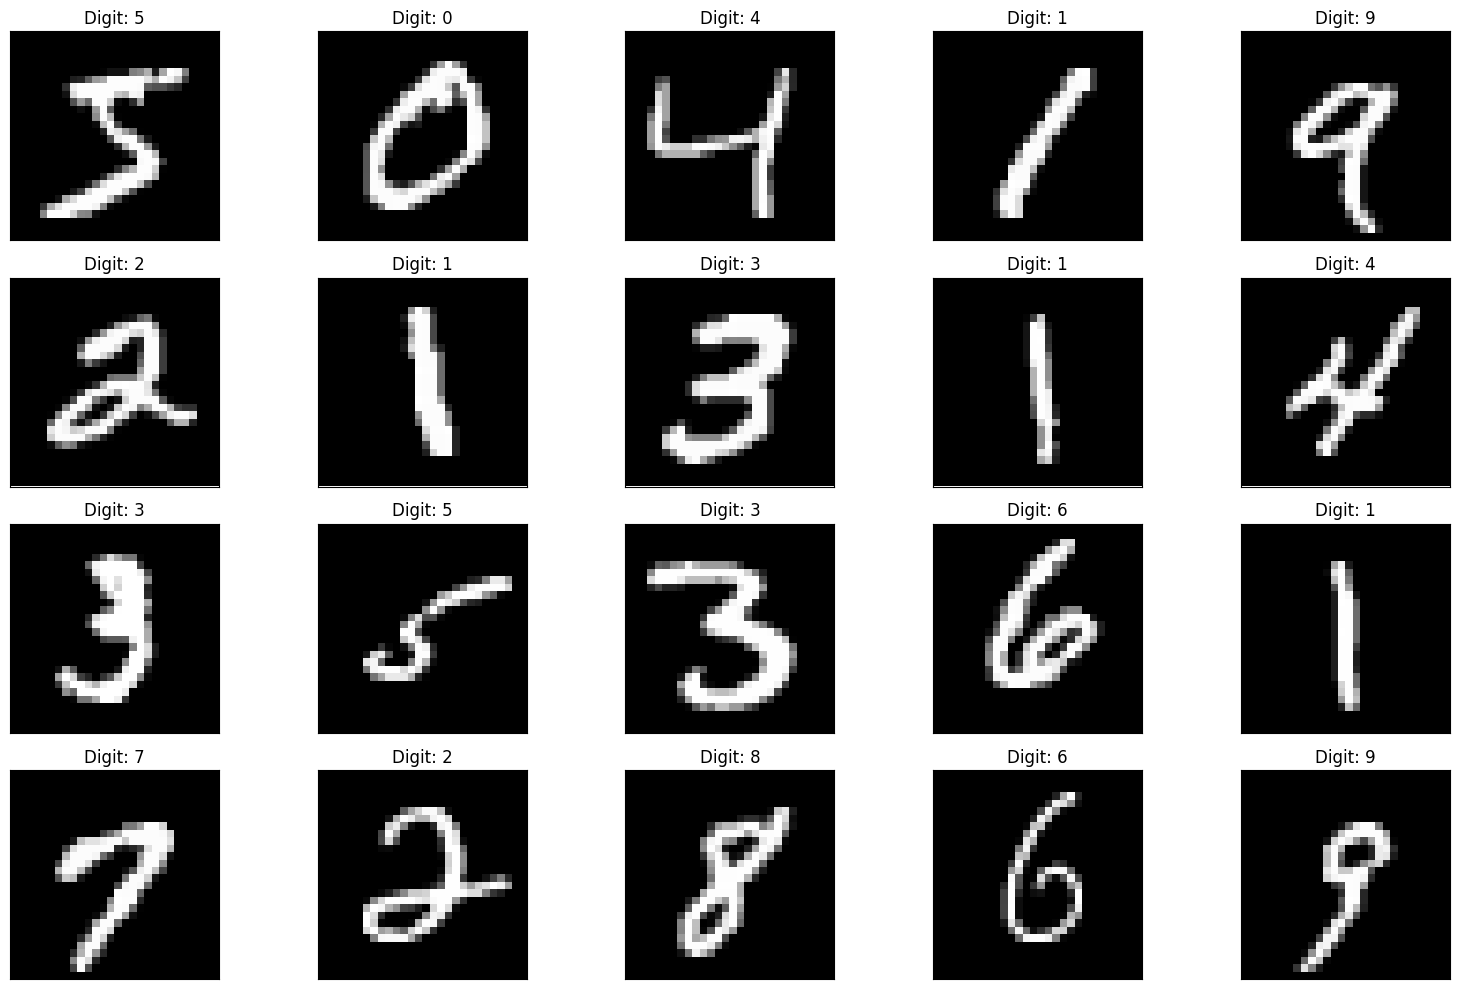

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)  # Create a subplot in a 4x5 grid
    plt.imshow(image, cmap='gray')  # Display the image in grayscale
    plt.title(f"Digit: {digit}")  # Set the title for the subplot
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks

# Set the figure size before the loop
plt.figure(figsize=(16, 10))

for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)  # Call the function for each digit

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot


In [ ]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [ ]:
y_train_subset = np.array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=np.uint8)
print(y_train_subset)

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [ ]:
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)),
Flatten(),
Dense(100, activation='relu'),
Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.8615 - loss: 0.4478
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9769 - loss: 0.0793
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9854 - loss: 0.0480
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9897 - loss: 0.0344
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9919 - loss: 0.0255
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9948 - loss: 0.0184
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.9959 - loss: 0.0134
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9974 - loss: 0.0096
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9985 - loss: 0.0064
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9990 - loss: 0.0047


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


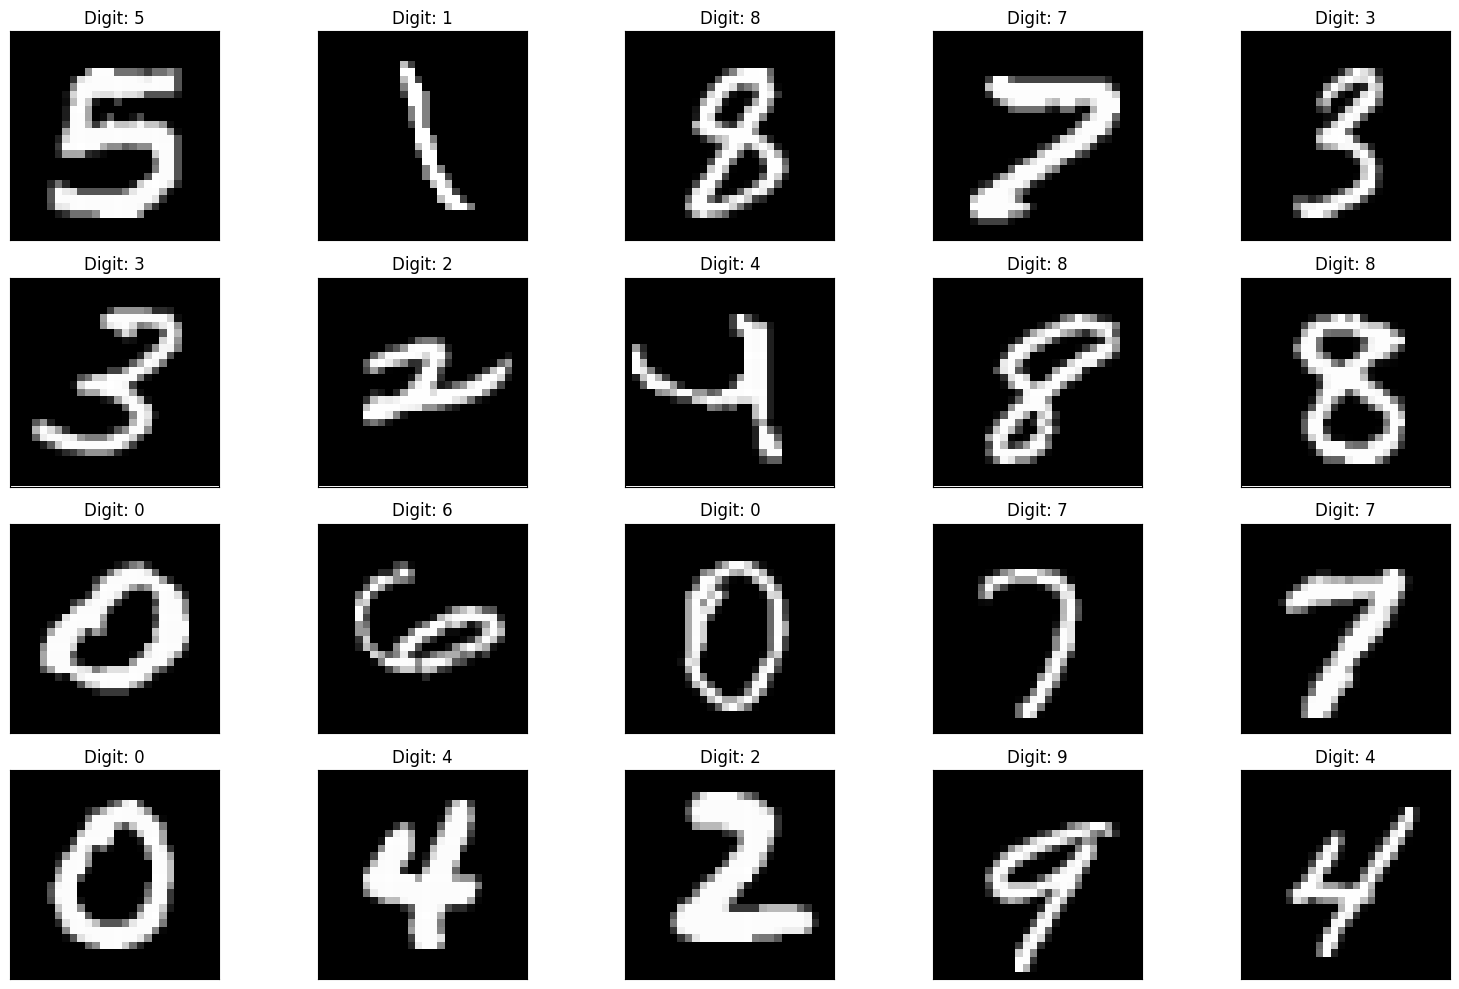

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import random

plt.figure(figsize=(16, 10))

for i in range(20):
    # Choose a random image from X_test
    image = random.choice(X_test).squeeze()

    # Reshape image if needed to (28, 28, 1) for model input
    image = image.reshape((28, 28, 1)) if len(image.shape) == 2 else image

    # Predict the digit
    prediction = model.predict(image.reshape((1, 28, 28, 1)))
    digit = np.argmax(prediction[0])  # Get the predicted digit by finding the class with max probability

    # Plot the image and the prediction
    plot_digit(image.squeeze(), digit, plt, i)

plt.tight_layout()
plt.show()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9880 - val_loss: 0.0427
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.9883 - val_loss: 0.0437
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 0.9885 - val_loss: 0.0433
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.9887 - val_loss: 0.0423
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 1.0000 - loss: 7.0025e-04 - val_accuracy: 0.9892 - val_loss: 0.0407
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 1.0000 - loss: 5.7644e-04 - val_accuracy: 0.9887 - val_loss: 0.0426
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 1.0000 - loss: 4.8689e-04 - val_accuracy: 0.9887 - val_loss: 0.0425
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accura

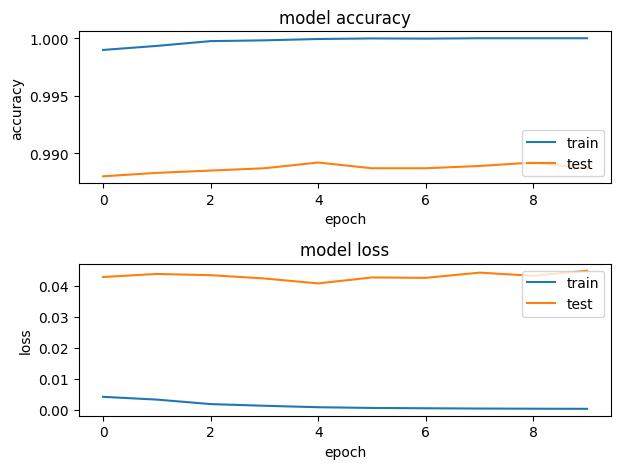

In [20]:
import os
fig = plt.figure()
plt.subplot(2,1,1)
model_log = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()